<a href="https://colab.research.google.com/github/PyKnight-vedant/DataZenPrac/blob/main/DataZen_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip install opendatasets

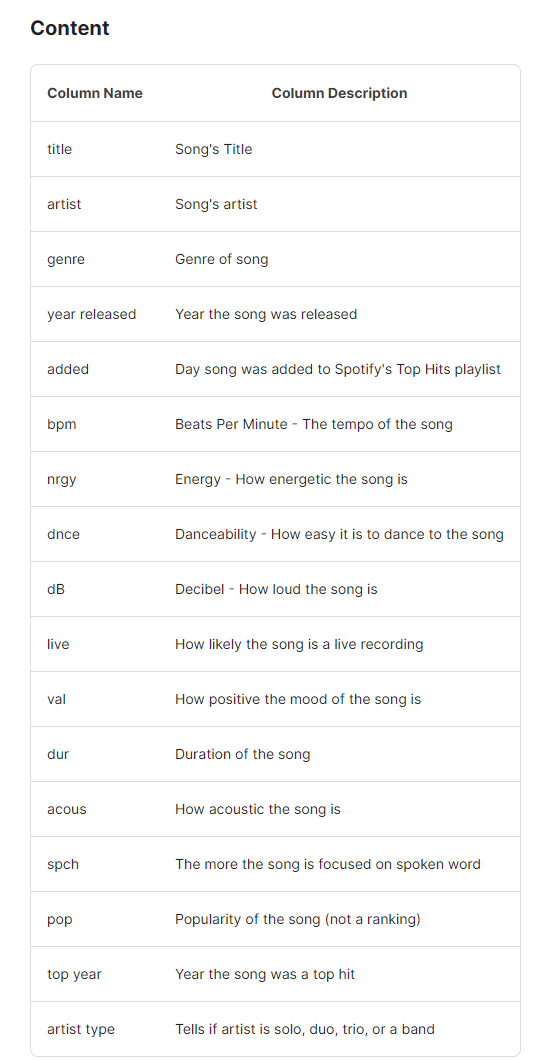#About Dataset
###Content:
This is a complete dataset of all the "Top 200" and "Viral 50" charts published globally by Spotify. Spotify publishes a new chart every 2-3 days. This is its entire collection since January 1, 2017.

###Note:
The value of streams is NULL when the chart column is "viral50".

#MY AGENDA:

1) Top 10 artists

2) Top 20 songs

3) Genre that is producing maximum no of songs in general

4) Analysis of song features or audio features of Spotify songs



In [112]:
import opendatasets as od

In [113]:
import pandas as pd
import numpy as np

In [114]:
od.download(r"https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019")

Skipping, found downloaded files in "./spotify-top-100-songs-of-20152019" (use force=True to force download)


In [115]:
df=pd.read_csv(r"/content/spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100.csv")


In [116]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


In [118]:
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


In [119]:
null_check=pd.DataFrame(df.isna())

null_check

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1001,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**Conclusion 1:**Null rows exist

In [120]:
df.drop([1000,1001,1002],inplace=True)
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo


In [121]:
df.value_counts()

title                          artist           top genre      year released  added       bpm    nrgy  dnce  dB     live  val   dur    acous  spch  pop   top year  artist type
  7/11                         Beyoncé          dance pop      2014.0         2020‑06‑19  136.0  71.0  75.0  -5.0   13.0  56.0  214.0  1.0    13.0  74.0  2015.0    Solo           1
Ride It                        Regard           dance pop      2019.0         2020‑06‑22  118.0  75.0  88.0  -4.0   11.0  88.0  158.0  18.0   9.0   85.0  2019.0    Solo           1
Ransom                         Lil Tecca        melodic rap    2019.0         2020‑06‑22  180.0  64.0  75.0  -6.0   7.0   23.0  131.0  2.0    29.0  83.0  2019.0    Solo           1
Rather Be (feat. Jess Glynne)  Clean Bandit     dance pop      2014.0         2020‑06‑10  121.0  59.0  80.0  -7.0   19.0  55.0  228.0  16.0   4.0   77.0  2014.0    Band/Group     1
Read All About It              Professor Green  grime          2021.0         2020‑06‑16  101.0  75.

**Conclusion:**  This tells us that all values are unique

In [122]:
df.dtypes

title             object
artist            object
top genre         object
year released    float64
added             object
bpm              float64
nrgy             float64
dnce             float64
dB               float64
live             float64
val              float64
dur              float64
acous            float64
spch             float64
pop              float64
top year         float64
artist type       object
dtype: object

In [123]:
null_check.drop([1000,1001,1002],inplace=True)
print(null_check[null_check==True])


    title artist top genre year released added  bpm nrgy dnce   dB live  val  \
0     NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1     NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2     NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..    ...    ...       ...           ...   ...  ...  ...  ...  ...  ...  ...   
995   NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
996   NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
997   NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
998   NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
999   NaN    NaN       NaN           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

     dur acous spch  pop top year artis

In [124]:
df.fillna(0,inplace=True)

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Major Conclusion 1: Top 10 artists of the decade

In [126]:
df["artist"].value_counts().head(10)

Taylor Swift     21
Drake            18
Calvin Harris    18
Rihanna          14
Ariana Grande    14
Bruno Mars       13
Maroon 5         11
Post Malone      10
Jason Derulo     10
Ed Sheeran       10
Name: artist, dtype: int64

In [127]:
l1=["bpm","nrgy","dnce","dB","live","val","acous","pop"]
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df[l1]=scaler.fit_transform(df[l1])

In [128]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,203.0,0.000000,6.0,0.583333,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,192.0,0.010204,8.0,0.550000,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,243.0,0.204082,3.0,0.616667,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,180.0,0.112245,12.0,0.750000,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,268.0,0.397959,5.0,0.733333,2010.0,Solo


In [129]:
df.corr()

<ipython-input-129-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
year released,1.000000,-0.017916,-0.237744,0.222459,-0.116566,-0.115106,-0.091306,-0.248134,0.151539,0.149373,0.182793,0.854339
bpm,-0.017916,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368,-0.025058,-0.016887
nrgy,-0.237744,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790,-0.234011,-0.302535
dnce,0.222459,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734,0.093176,0.218019
dB,-0.116566,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838,-0.145403,-0.173286
live,-0.115106,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516,-0.137305,-0.121331
val,-0.091306,0.021128,0.372866,0.264781,0.317128,0.028092,1.000000,-0.185863,-0.164048,0.013192,-0.003752,-0.122825
dur,-0.248134,-0.016536,-0.049662,-0.168483,-0.082541,-0.003094,-0.185863,1.000000,0.026474,-0.035451,0.009219,-0.215213
acous,0.151539,-0.124614,-0.504083,-0.075999,-0.392393,-0.116081,-0.164048,0.026474,1.000000,-0.010204,0.128195,0.181747
spch,0.149373,0.149368,-0.099790,0.161734,-0.165838,0.043516,0.013192,-0.035451,-0.010204,1.000000,0.061441,0.165890


<ipython-input-130-e575a72133cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

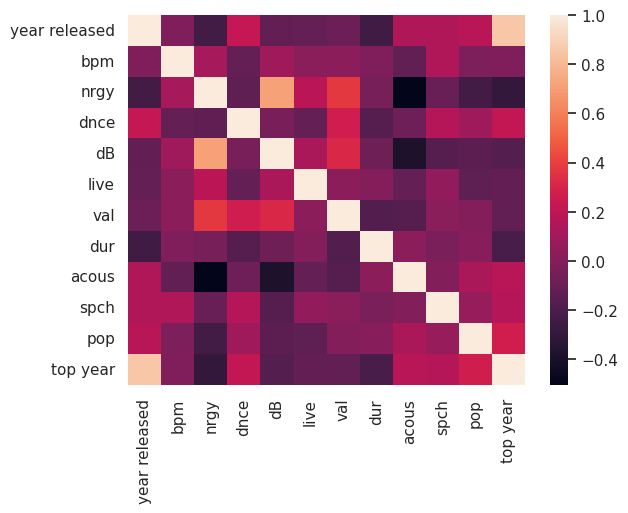

In [130]:
sns.set(style='darkgrid')
sns.heatmap(df.corr())

#Major Conclusion 2:
Energy(nrgy) and Decibel(dB) are highly related.
    
Energy(nrgy) and Acoustic level(acous) of the song are inversely related.



In [131]:
df.corr().index

<ipython-input-131-c93f983ca56f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().index


Index(['year released', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop', 'top year'],
      dtype='object')

<ipython-input-132-efd8026de0a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attributes=df.corr().index


array([[<Axes: xlabel='year released', ylabel='year released'>,
        <Axes: xlabel='bpm', ylabel='year released'>,
        <Axes: xlabel='nrgy', ylabel='year released'>,
        <Axes: xlabel='dnce', ylabel='year released'>,
        <Axes: xlabel='dB', ylabel='year released'>,
        <Axes: xlabel='live', ylabel='year released'>,
        <Axes: xlabel='val', ylabel='year released'>,
        <Axes: xlabel='dur', ylabel='year released'>,
        <Axes: xlabel='acous', ylabel='year released'>,
        <Axes: xlabel='spch', ylabel='year released'>,
        <Axes: xlabel='pop', ylabel='year released'>,
        <Axes: xlabel='top year', ylabel='year released'>],
       [<Axes: xlabel='year released', ylabel='bpm'>,
        <Axes: xlabel='bpm', ylabel='bpm'>,
        <Axes: xlabel='nrgy', ylabel='bpm'>,
        <Axes: xlabel='dnce', ylabel='bpm'>,
        <Axes: xlabel='dB', ylabel='bpm'>,
        <Axes: xlabel='live', ylabel='bpm'>,
        <Axes: xlabel='val', ylabel='bpm'>,
        <Ax

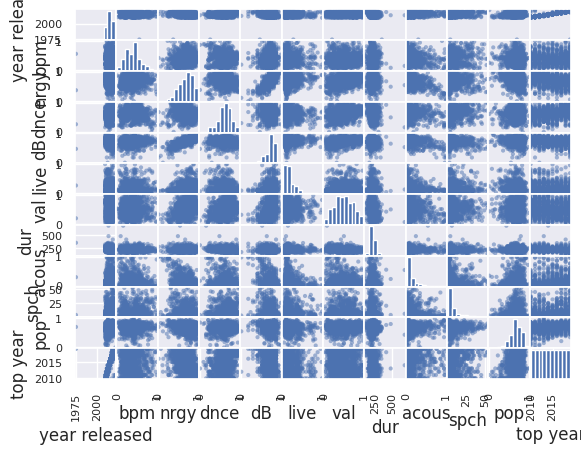

In [132]:
from pandas.plotting import scatter_matrix
attributes=df.corr().index
scatter_matrix(df[attributes])

In [133]:
for i in df.corr().index:
  print(i)
  print(df.corr()[i].nlargest(2))
  print(df.corr()[i].idxmin()," ",df.corr()[i].min())
  print()

year released
year released    1.000000
top year         0.854339
Name: year released, dtype: float64
dur   -0.24813376833250947

bpm
bpm     1.000000
spch    0.149368
Name: bpm, dtype: float64
acous   -0.12461381200963649

nrgy
nrgy    1.000000
dB      0.713428
Name: nrgy, dtype: float64
acous   -0.5040830333119254

dnce
dnce    1.000000
val     0.264781
Name: dnce, dtype: float64
dur   -0.16848299650215023

dB
dB      1.000000
nrgy    0.713428
Name: dB, dtype: float64
acous   -0.3923932797971268

live
live    1.000000
nrgy    0.184094
Name: live, dtype: float64
pop   -0.1373045961514344

val
val     1.000000
nrgy    0.372866
Name: val, dtype: float64
dur   -0.1858631944961132

dur
dur      1.000000
acous    0.026474
Name: dur, dtype: float64
year released   -0.24813376833250947

acous
acous       1.000000
top year    0.181747
Name: acous, dtype: float64
nrgy   -0.5040830333119254

spch
spch        1.00000
top year    0.16589
Name: spch, dtype: float64
dB   -0.16583826718280992

pop
p

<ipython-input-133-d0ca2e88be33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in df.corr().index:
<ipython-input-133-d0ca2e88be33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()[i].nlargest(2))
<ipython-input-133-d0ca2e88be33>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()[i].idxmin()," ",df.corr()[i].min())
<ipython-input-133-d0ca2e88be33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a fu

<Axes: xlabel='nrgy', ylabel='dB'>

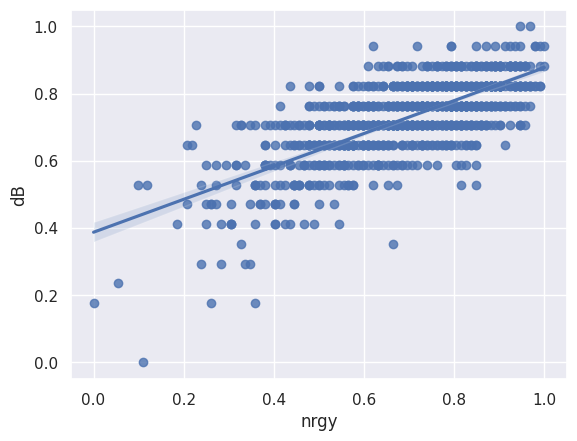

In [134]:
sns.regplot(x="nrgy",y="dB",data=df)

This graph proves that energy and decibel are clearly related as stated above.
The strongest relation so far.

<Axes: xlabel='acous', ylabel='dB'>

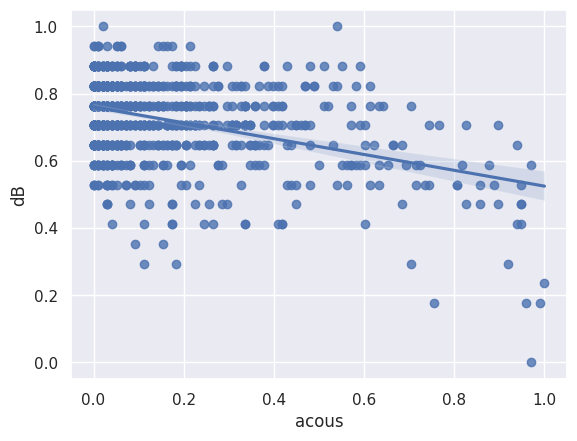

In [135]:
sns.regplot(x="acous",y="dB",data=df)

In [136]:
df.shape


(1000, 17)

In [137]:
df.nunique()

title            945
artist           444
top genre        132
year released     14
added             26
bpm              122
nrgy              80
dnce              68
dB                16
live              67
val               93
dur              176
acous             89
spch              50
pop               55
top year          10
artist type        4
dtype: int64

In [138]:
df["year released"]=df["year released"].astype(int)

In [139]:
df["year released"].head()

0    2009
1    2010
2    2010
3    2010
4    2010
Name: year released, dtype: int64

In [140]:
df["artist type"].value_counts()

Solo          748
Band/Group    169
Duo            70
Trio           13
Name: artist type, dtype: int64

Text(0.5, 1.0, 'Count of Artist types')

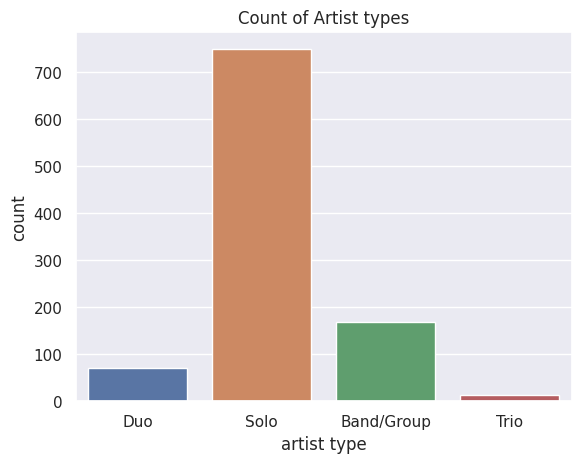

In [141]:
sns.countplot(x="artist type",data=df)
plt.title("Count of Artist types")


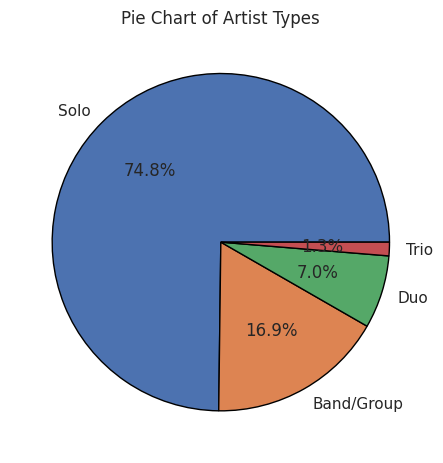

In [142]:
data=df["artist type"].value_counts().values
labels=df["artist type"].value_counts().index
### Using the plot command (passing the "autopct" argument)
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})

### Plot decoration
plt.title("Pie Chart of Artist Types")
plt.tight_layout()
plt.show()

**Solo is the way!!!**

#Major Conclusion 3: Solo is the most common artist type.

In [143]:
df["top genre"].value_counts()


dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french shoegaze       1
new french touch      1
hip pop               1
australian psych      1
uk drill              1
Name: top genre, Length: 132, dtype: int64

<Axes: >

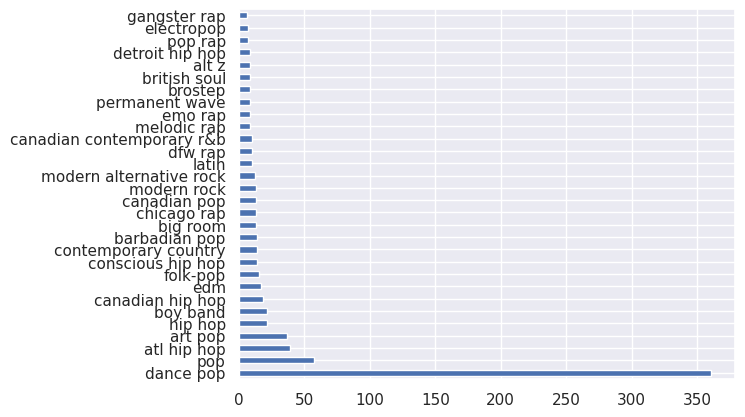

In [144]:
df["top genre"].value_counts().iloc[0:30].plot(kind="barh")



#Major Conclusion 4:
Dance pop.....

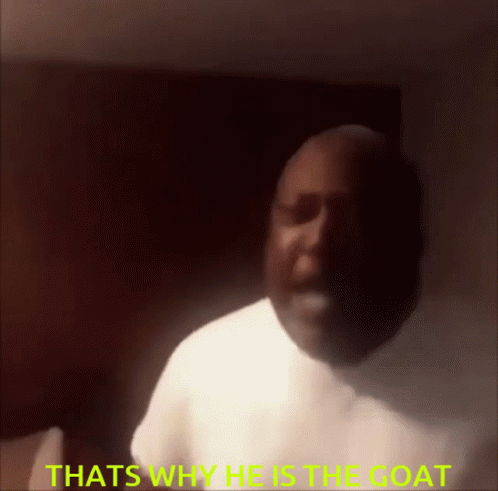

The goat🐐😂😂😂😂

In [145]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,203.0,0.000000,6.0,0.583333,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,192.0,0.010204,8.0,0.550000,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,243.0,0.204082,3.0,0.616667,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,180.0,0.112245,12.0,0.750000,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,268.0,0.397959,5.0,0.733333,2010.0,Solo


In [146]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [147]:
df.sort_values("pop",ascending=False).loc[:,['title','artist','pop']].head(20)

,title,artist,pop
392,Sweater Weather,The Neighbourhood,1.000000
394,Another Love,Tom Odell,0.983333
211,Locked out of Heaven,Bruno Mars,0.933333
809,lovely (with Khalid),Billie Eilish,0.933333
231,Lost,Frank Ocean,0.933333
736,Believer,Imagine Dragons,0.933333
316,Locked out of Heaven,Bruno Mars,0.933333
914,lovely (with Khalid),Billie Eilish,0.933333
442,All of Me,John Legend,0.916667
302,Why'd You Only Call Me When You're High?,Arctic Monkeys,0.916667


#Major Conclusion 5: This is the list of the top 20 most popular songs of the dataset.

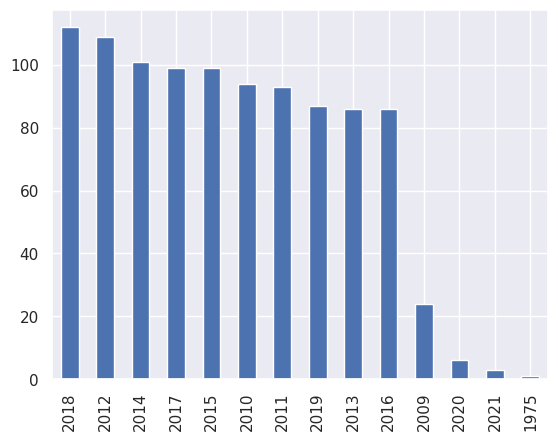

In [149]:
data=df["year released"].value_counts().sort_values(ascending=False).plot(kind="bar")

#Major Conclusion 6:Max no of releases were witnessed in the year 2018.

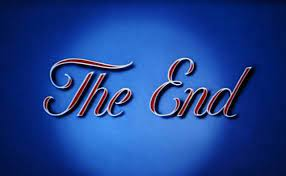

Agenda completed✅

Feel free to comment and advise improvements.